### <font color='red'> Fraudulent Firm Prediction - Classification

### Author: Ankit Raina
### Date of Creation: April 24, 2019


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audit_risk_data = pd.read_csv('audit_risk.csv')
trial_data = pd.read_csv('trial.csv')

In [3]:
common_columns = audit_risk_data.columns.intersection(trial_data.columns).tolist()
merged_audit_risk_data = pd.merge(audit_risk_data, trial_data, how = 'inner', left_on=common_columns, right_on=common_columns)

In [4]:
merged_audit_risk_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,1.7148,1,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5108,0,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.3096,0,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,3.5060,1,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2832,0,2,2,2,2,2,0,2,2


In [5]:
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

In [6]:
merged_audit_risk_data = merged_audit_risk_data.replace(r'[^\d.]+',np.nan,regex=True)
merged_audit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       626 non-null object
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CON

In [7]:
merged_audit_risk_data.isna().any()

Sector_score      False
LOCATION_ID        True
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
SCORE_A           False
SCORE_B           False
Marks             False
MONEY_Marks       False
District          False
Loss              False
LOSS_SCORE        False
History_score     False
dtype: bool

In [8]:
merged_audit_risk_data = merged_audit_risk_data.dropna()

In [9]:
merged_audit_risk_data.info()
merged_audit_risk_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      625 non-null float64
LOCATION_ID       625 non-null object
PARA_A            625 non-null float64
Score_A           625 non-null float64
Risk_A            625 non-null float64
PARA_B            625 non-null float64
Score_B           625 non-null float64
Risk_B            625 non-null float64
TOTAL             625 non-null float64
numbers           625 non-null float64
Score_B.1         625 non-null float64
Risk_C            625 non-null float64
Money_Value       625 non-null float64
Score_MV          625 non-null float64
Risk_D            625 non-null float64
District_Loss     625 non-null int64
PROB              625 non-null float64
RiSk_E            625 non-null float64
History           625 non-null int64
Prob              625 non-null float64
Risk_F            625 non-null float64
Score             625 non-null float64
Inherent_Risk     625 non-null float64
CON

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,Audit_Risk,Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,...,625.000000,625.000000,625.000000,625.000000,625.00000,625.000000,625.000000,625.000000,625.000000,625.000000
mean,21.458752,2.638337,0.339200,1.490003,13.189666,0.320640,7.767216,15.788643,5.082400,0.228800,...,8.747667,0.491200,3.392000,3.206400,2.28800,3.110400,2.560000,0.033600,2.070400,2.204800
std,24.583572,6.295894,0.180853,3.805486,55.547565,0.176794,33.354451,56.883767,0.291455,0.088085,...,42.943459,0.500323,1.808527,1.767937,0.88085,1.710349,1.330124,0.197315,0.402123,0.748701
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.280000,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.720000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.210000,5.000000,0.200000,...,0.299200,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.650000,0.200000,0.130000,0.430000,0.200000,0.086000,1.050000,5.000000,0.200000,...,0.444800,0.000000,2.000000,2.000000,2.00000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.920000,0.600000,1.752000,6.720000,0.600000,3.448000,11.120000,5.000000,0.200000,...,4.971600,1.000000,6.000000,6.000000,2.00000,4.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,961.514400,1.000000,6.000000,6.000000,6.00000,6.000000,6.000000,2.000000,6.000000,6.000000


## Feature Selection for Classification

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


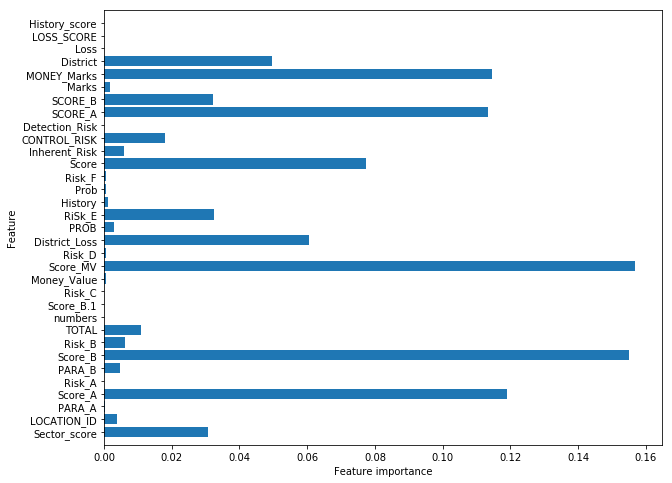

In [10]:
X = merged_audit_risk_data.loc[:, ~merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]
y = merged_audit_risk_data.loc[:, merged_audit_risk_data.columns.isin(['Audit_Risk', 'Risk'])]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=0)
model.fit(X, y['Risk'])

%matplotlib inline
def plot_feature_importances(model):
    plt.figure(figsize=(10,8))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(model)

In [11]:
corr_matrix = merged_audit_risk_data.corr().abs()
high_corr_var = np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('PARA_A', 'Risk_A'),
 ('Score_A', 'SCORE_A'),
 ('PARA_B', 'Risk_B'),
 ('PARA_B', 'TOTAL'),
 ('Score_B', 'Score'),
 ('Score_B', 'SCORE_B'),
 ('Risk_B', 'TOTAL'),
 ('numbers', 'Score_B.1'),
 ('numbers', 'Risk_C'),
 ('numbers', 'Marks'),
 ('Score_B.1', 'Risk_C'),
 ('Score_B.1', 'Marks'),
 ('Risk_C', 'Marks'),
 ('Money_Value', 'Risk_D'),
 ('Score_MV', 'MONEY_Marks'),
 ('District_Loss', 'RiSk_E'),
 ('District_Loss', 'District'),
 ('PROB', 'Loss'),
 ('PROB', 'LOSS_SCORE'),
 ('RiSk_E', 'District'),
 ('History', 'Risk_F'),
 ('Prob', 'History_score'),
 ('Score', 'SCORE_B'),
 ('Loss', 'LOSS_SCORE')]

In [12]:
features_for_classification = ['TOTAL','Inherent_Risk', 'Prob', 'Score', 'CONTROL_RISK', 'District_Loss', 'Score_MV','District','MONEY_Marks']
X = X.loc[:, features_for_classification]

In [13]:
from sklearn.model_selection import train_test_split

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# We have two output variables Audit_Risk and Risk
# Assessing Audit_Risk is a regression problem whereas assessing Risk is a binary classification problem
y_reg_trainval = y_trainval['Audit_Risk']
y_reg_test = y_test['Audit_Risk']

y_cls_trainval = y_trainval['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_trainval = scaler.fit_transform(X_trainval_org)
X_test = scaler.fit_transform(X_test_org)

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
X_trainval.shape

(500, 9)

## Voting Classifier - Soft

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
log_clf.fit(X_trainval, y_cls_trainval)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_trainval, y_cls_trainval)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_trainval, y_cls_trainval)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_trainval, y_cls_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_cls_test, y_pred))


LogisticRegression 0.984
KNeighborsClassifier 1.0
SVC 0.984
VotingClassifier 1.0


c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

## Voting classifier - Hard

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
log_clf.fit(X_trainval, y_cls_trainval)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_trainval, y_cls_trainval)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_trainval, y_cls_trainval)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_trainval, y_cls_trainval)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_cls_test, y_pred))


LogisticRegression 0.984
KNeighborsClassifier 1.0
SVC 0.984
VotingClassifier 0.984


c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0

# Bagging and Pasting

### Bagging - Decision Tree

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0)

bag_clf.fit(X_trainval, y_cls_trainval)
y_pred = bag_clf.predict(X_test)

In [19]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_cls_test, y_pred))

1.0


In [20]:
bag_clf.fit(X_trainval, y_cls_trainval)
print('Train score: {:.2f}'.format(bag_clf.score(X_trainval, y_cls_trainval)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_cls_test)))

Train score: 1.00
Test score: 1.00


In [21]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_trainval, y_cls_trainval)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_cls_test, y_pred_tree))

1.0


In [22]:
dt_clf = DecisionTreeClassifier(random_state=0)

bag_clf = BaggingClassifier(dt_clf, n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True, random_state=0)

bag_clf.fit(X_trainval, y_cls_trainval)
bag_clf.oob_score_

0.998

## Bagging - knn

In [23]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier(n_neighbors=1)

n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators= n_estimators_vals, max_samples=max_samples_vals)

bag_knn = BaggingClassifier(knn,bootstrap = True, random_state= 0)

grid_search = GridSearchCV(bag_knn, param_grid=dict(n_estimators= n_estimators_vals, max_samples=max_samples_vals), cv=kfold, return_train_score=True)
grid_search.fit(X_trainval, y_cls_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))



Best parameters: {'max_samples': 50, 'n_estimators': 200}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 1.0000


### Pasting - Decision tress

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
pasting_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

pasting_clf.fit(X_trainval, y_cls_trainval)
y_pred = pasting_clf.predict(X_test)

In [27]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_cls_test, y_pred))

1.0


In [28]:
pasting_clf.fit(X_trainval, y_cls_trainval)
print('Train score: {:.2f}'.format(pasting_clf.score(X_trainval, y_cls_trainval)))
print('Test score: {:.2f}'.format(pasting_clf.score(X_test, y_cls_test)))

Train score: 1.00
Test score: 1.00


In [29]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_trainval, y_cls_trainval)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_cls_test, y_pred_tree))

1.0


## Pasting - knn

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier(n_neighbors=1)

n_estimators_vals = [100, 200, 300, 400, 500]
max_samples_vals = [10, 50, 70, 100, 120, 150, 170, 200]

param_grid = dict(n_estimators= n_estimators_vals, max_samples=max_samples_vals)

pasting_knn = BaggingClassifier(knn,bootstrap = False, random_state= 0)

grid_search = GridSearchCV(pasting_knn, param_grid=dict(n_estimators= n_estimators_vals, max_samples=max_samples_vals), cv=kfold, return_train_score=True)
grid_search.fit(X_trainval, y_cls_trainval)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))


Best parameters: {'max_samples': 50, 'n_estimators': 100}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 1.0000


# AdaBoost 

### AdaBoost Boosting - Decision Tree

In [31]:
from sklearn.ensemble import AdaBoostClassifier

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

y_cls_trainval = y_trainval['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_trainval, y_cls_trainval)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=0)

In [32]:
y_pred = ada_clf.predict(X_test)

In [33]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_cls_test, y_pred))

1.0


In [34]:
ada_clf.fit(X_trainval, y_cls_trainval)
print('Train score: {:.2f}'.format(ada_clf.score(X_trainval, y_cls_trainval)))
print('Test score: {:.2f}'.format(ada_clf.score(X_test, y_cls_test)))

Train score: 1.00
Test score: 1.00


## AdaBoost Boosting - SVC


In [35]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC
from sklearn import metrics

svc = SVC(probability = True, kernel = 'linear')

ada_svc = AdaBoostClassifier(n_estimators= 50, base_estimator=svc, learning_rate=1)
ada_svc.fit(X_trainval,y_cls_trainval)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          learning_rate=1, n_estimators=50, random_state=None)

In [36]:
y_pred = ada_svc.predict(X_test)

In [37]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_cls_test, y_pred))

1.0


In [38]:

print('Train score: {:.2f}'.format(ada_svc.score(X_trainval, y_cls_trainval)))
print('Test score: {:.2f}'.format(ada_svc.score(X_test, y_cls_test)))

Train score: 1.00
Test score: 1.00


#  Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X_trainval_org, X_test_org, y_trainval, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_trainval, y_cls_trainval)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_cls_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_cls_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [40]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_trainval, y_cls_trainval)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_cls_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_cls_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [41]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_trainval, y_cls_trainval)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_trainval, y_cls_trainval)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_cls_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


# Deep Learning Models


In [42]:

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [43]:
# step 1: build the model
model1 = Sequential()
#input leyer
model1.add(Dense(10, input_dim = 9, activation = 'relu'))
#hidden layer
model1.add(Dense(5, activation = 'relu'))
#output layer
model1.add(Dense(1, activation = 'sigmoid'))

# step 2: build the computational graph - compile
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# step 3: train the model
model1.fit(X_trainval, y_cls_trainval, epochs = 20, batch_size = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
500/500 [==============================] - 0s 960us/sample - loss: 0.6754 - acc: 0.8100
Epoch 2/20
500/500 [==============================] - 0s 29us/sample - loss: 0.6716 - acc: 0.9140
Epoch 3/20
500/500 [==============================] - 0s 27us/sample - loss: 0.6675 - acc: 0.9460
Epoch 4/20
500/500 [==============================] - 0s 21us/sample - loss: 0.6631 - acc: 0.9560
Epoch 5/20
500/500 [==============================] - 0s 28us/sample - loss: 0.6576 - acc: 0.9740
Epoch 6/20
500/500 [==============================] - 0s 23us/sample - loss: 0.6513 - acc: 0.9960
Epoch 7/20
500/500 [==============================] - 0s 21us/sample - loss: 0.6446 - acc: 1.0000
Epoch 8/20
500/500 [==============================] - 0s 25us/sample - loss: 0.6376 - acc: 1.0000
Epoch 9/20
500/500 [==============================] - 0s 20us/sample - loss: 0.6308 - acc: 1.00

In [44]:
model1.evaluate(X_trainval, y_cls_trainval)

500/500 [==============================] - 0s 231us/sample - loss: 0.5454 - acc: 1.0000


[0.5454196567535401, 1.0]

In [45]:
model1.evaluate(X_test, y_cls_test)

125/125 [==============================] - 0s 48us/sample - loss: 0.5272 - acc: 1.0000


[0.5271959962844849, 1.0]

In [46]:
y_pred = model1.predict(X_trainval)

In [47]:
from sklearn.metrics import precision_score

In [48]:
y_train_pred = np.where(y_pred >= 0.5, 1, 0)

In [49]:
precision_score(y_cls_trainval, y_train_pred)

1.0

# PCA


In [51]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95,random_state = 0)

pca.fit(X)
X_red = pca.transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_train, y_test = train_test_split(X_red,y, random_state = 0)

In [53]:

y_cls_trainval = y_train['Risk'].astype(np.int64)
y_cls_test = y_test['Risk'].astype(np.int64)

In [54]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

## K Nearest Neighbors Classification with PCA

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [56]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'n_neighbors': 1}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 0.9961


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003271,0.001859,0.012117,0.005574,1,{'n_neighbors': 1},1.000000,1.000000,1.000000,1.000000,...,0.996104,0.007824,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002233,0.001667,0.007375,0.000980,2,{'n_neighbors': 2},1.000000,0.988506,0.987654,1.000000,...,0.993244,0.005567,4,1.000000,0.997333,0.997375,1.000000,1.000000,0.998942,0.001296
2,0.001393,0.000807,0.004805,0.002200,3,{'n_neighbors': 3},0.989899,1.000000,0.987952,1.000000,...,0.993584,0.005288,3,1.000000,0.997347,0.994792,1.000000,1.000000,0.998428,0.002088
3,0.001094,0.000672,0.006608,0.001763,4,{'n_neighbors': 4},1.000000,1.000000,0.987952,1.000000,...,0.995613,0.005421,2,1.000000,0.997347,0.997389,0.997275,1.000000,0.998402,0.001305
4,0.002630,0.001353,0.008633,0.002477,5,{'n_neighbors': 5},0.989899,0.988764,0.987952,1.000000,...,0.991327,0.004389,5,0.991870,0.992084,0.989637,0.991870,0.997260,0.992544,0.002522
5,0.002911,0.001345,0.007872,0.002060,6,{'n_neighbors': 6},0.979592,0.988764,0.975610,0.989474,...,0.984686,0.005956,8,0.989130,0.994709,0.989637,0.991870,0.997260,0.992521,0.003082
6,0.002596,0.001354,0.008846,0.001048,7,{'n_neighbors': 7},0.979592,0.977778,0.975610,0.989474,...,0.982479,0.006071,11,0.989130,0.992084,0.989637,0.986523,0.991826,0.989840,0.002026
7,0.002246,0.000903,0.009615,0.001562,8,{'n_neighbors': 8},0.979592,0.988764,0.975610,0.989474,...,0.984686,0.005956,8,0.989130,0.989418,0.989637,0.989189,0.991826,0.989840,0.001009
8,0.001796,0.000400,0.006822,0.001445,9,{'n_neighbors': 9},0.979592,0.988764,0.963855,0.989474,...,0.982325,0.010025,14,0.989130,0.992084,0.989637,0.986523,0.989130,0.989301,0.001768
9,0.001938,0.000930,0.008916,0.002369,10,{'n_neighbors': 10},0.979592,1.000000,0.975610,0.978723,...,0.984806,0.009041,7,0.989130,0.992000,0.989637,0.983516,0.991826,0.989222,0.003073


In [57]:
knn = KNeighborsClassifier(1)
knn.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, knn.predict(X_test)))
print('Accuracy: {:.4f}'.format(knn.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        82
           1       0.95      1.00      0.97        75

   micro avg       0.97      0.97      0.97       157
   macro avg       0.97      0.98      0.97       157
weighted avg       0.98      0.97      0.97       157

Accuracy: 0.9745


## knn classification without PCA


The Mean Train F1-score is  1.0000

The Mean Validation F1-score is 0.9956


                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

Accuracy: 1.0000

## Logistic Regression with PCA

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\pytho

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sanjana\appdata\local\programs\python\python36\

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [59]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 1000, 'penalty': 'l2'}
Best Mean Train F1-score: 0.9946
Best Mean Validation F1-score: 0.9928


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002094,0.003709,0.001455,0.001790,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.619718,0.580645,0.655738,...,0.635594,0.055817,13,0.644444,0.652330,0.635714,0.652015,0.610687,0.639038,0.015422
1,0.003258,0.001650,0.000993,0.001534,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.638889,0.580645,0.633333,...,0.638088,0.060416,12,0.649446,0.657143,0.640569,0.661818,0.615970,0.644989,0.016202
2,0.003460,0.001371,0.000400,0.000490,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.619718,0.580645,0.655738,...,0.635594,0.055817,13,0.644444,0.652330,0.635714,0.652015,0.610687,0.639038,0.015422
3,0.002073,0.001591,0.000990,0.001532,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.675676,0.625000,0.655738,...,0.666902,0.045358,11,0.669091,0.685315,0.678201,0.681004,0.651852,0.673092,0.011876
4,0.002189,0.002037,0.002041,0.001706,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.860465,0.826667,0.876712,...,0.864354,0.024447,9,0.863354,0.877612,0.869822,0.864198,0.862500,0.867497,0.005670
5,0.000989,0.001529,0.001345,0.001689,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.819277,0.794521,0.757576,...,0.798626,0.027591,10,0.792079,0.810127,0.813665,0.805195,0.798680,0.803949,0.007782
6,0.009113,0.003555,0.001775,0.001794,1,l1,"{'C': 1, 'penalty': 'l1'}",0.923077,0.886076,0.906667,...,0.920800,0.031582,4,0.923529,0.928775,0.926966,0.933333,0.916667,0.925854,0.005577
7,0.003378,0.001086,0.000199,0.000398,1,l2,"{'C': 1, 'penalty': 'l2'}",0.886364,0.857143,0.876712,...,0.887928,0.026117,8,0.890909,0.900585,0.895954,0.894895,0.880000,0.892469,0.006954
8,0.188822,0.028159,0.002271,0.001145,10,l1,"{'C': 10, 'penalty': 'l1'}",0.923077,0.886076,0.921053,...,0.923690,0.030806,3,0.923529,0.928775,0.932961,0.936416,0.916667,0.927670,0.006985
9,0.004881,0.001827,0.001767,0.000612,10,l2,"{'C': 10, 'penalty': 'l2'}",0.923077,0.886076,0.906667,...,0.920800,0.031582,4,0.923529,0.931818,0.929972,0.927114,0.916667,0.925820,0.005365


In [60]:
lreg = LogisticRegression(penalty = 'l1', C = 10)
lreg.fit(X_trainval, y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, lreg.predict(X_test)))
print('Accuracy: {:.4f}'.format(lreg.score(X_test, y_cls_test)))

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        82
           1       1.00      0.92      0.96        75

   micro avg       0.96      0.96      0.96       157
   macro avg       0.97      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157

Accuracy: 0.9618


c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Logistic Regression without PCA


The Mean Train F1-score is 1.0000

The Mean Validation F1-score is 1.0000

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

Accuracy: 1.0000


## Linear Support Vector Machine with PCA

In [61]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)
train_score_array = []
test_score_array = []

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\sanjana\appdata\local\programs\python\python36\lib\

In [62]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

results = pd.DataFrame(grid_search.cv_results_)
display(results)

Best parameters: {'C': 100}
Best Mean Train F1-score: 0.9232
Best Mean Validation F1-score: 0.9208


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004648,0.002267,0.001593,0.000522,0.001,{'C': 0.001},0.675676,0.580645,0.655738,0.628571,...,0.657993,0.055854,7,0.669091,0.680702,0.678201,0.681004,0.636704,0.669140,0.016785
1,0.005505,0.002537,0.002058,0.002190,0.01,{'C': 0.01},0.804878,0.777778,0.718750,0.769231,...,0.778758,0.035733,5,0.780000,0.798722,0.806250,0.789474,0.786667,0.792222,0.009239
2,0.024056,0.004029,0.002574,0.001616,0.1,{'C': 0.1},0.873563,0.857143,0.876712,0.883721,...,0.885357,0.026767,4,0.890909,0.897361,0.892754,0.891566,0.880000,0.890518,0.005722
3,0.019224,0.001467,0.001334,0.000908,1,{'C': 1},0.923077,0.871795,0.906667,0.896552,...,0.913350,0.032371,3,0.913947,0.922636,0.914773,0.917647,0.896970,0.913194,0.008663
4,0.018540,0.001102,0.001623,0.001012,10,{'C': 10},0.923077,0.886076,0.906667,0.896552,...,0.918309,0.032876,2,0.920354,0.928775,0.923944,0.927114,0.896970,0.919431,0.011594
5,0.019583,0.001355,0.002239,0.001345,100,{'C': 100},0.923077,0.886076,0.906667,0.909091,...,0.920800,0.031582,1,0.920354,0.928775,0.923944,0.939481,0.903614,0.923234,0.011734
6,0.021380,0.001488,0.002582,0.000700,1000,{'C': 1000},0.685315,0.886076,0.906667,0.680851,...,0.771990,0.102308,6,0.657092,0.928775,0.923944,0.658318,0.653501,0.764326,0.132318


In [63]:
lsvc = LinearSVC(C = 1)
lsvc.fit(X_trainval,y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, lsvc.predict(X_test)))
print('Accuracy: {:.4f}'.format(lsvc.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        82
           1       1.00      0.92      0.96        75

   micro avg       0.96      0.96      0.96       157
   macro avg       0.97      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157

Accuracy: 0.9618


c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Linear Support Vector Machine without PCA

The Mean Train F1-score is 1.0000

The Mean Validation F1-score is 0.9956

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

Accuracy: 1.0000

## Kernelized Support Vector Machine with PCA

In [64]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'kernel': ['linear', 'rbf', 'poly']}

grid_search = GridSearchCV(SVC(), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\sanjana\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [65]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
Best Mean Train F1-score: 1.0000
Best Mean Validation F1-score: 0.9980


In [66]:
results = pd.DataFrame(grid_search.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001717,0.002745,0.001774,0.001449,0.001,0.001,linear,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}",0.898876,0.857143,...,0.890442,0.026446,124,0.890909,0.903790,0.899135,0.898204,0.880000,0.894408,0.008302
1,0.006365,0.000766,0.003298,0.003112,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.000000,0.637681,...,0.250082,0.305349,138,0.000000,0.669039,0.676106,0.000000,0.000000,0.269029,0.329500
2,0.004185,0.001183,0.001873,0.000793,0.001,0.001,poly,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'poly'}",0.280702,0.400000,...,0.346326,0.050141,137,0.366071,0.336283,0.360515,0.342342,0.345455,0.350133,0.011280
3,0.001956,0.000719,0.001320,0.000887,0.001,0.01,linear,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}",0.898876,0.857143,...,0.890442,0.026446,124,0.890909,0.903790,0.899135,0.898204,0.880000,0.894408,0.008302
4,0.007774,0.001298,0.002457,0.001336,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.000000,0.637681,...,0.250082,0.305349,138,0.000000,0.669039,0.676106,0.000000,0.000000,0.269029,0.329500
5,0.001986,0.001254,0.000800,0.001167,0.001,0.01,poly,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}",0.911111,0.871795,...,0.908812,0.028185,119,0.907463,0.916427,0.917847,0.914454,0.896970,0.910632,0.007706
6,0.001425,0.000821,0.000598,0.000797,0.001,0.1,linear,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}",0.898876,0.857143,...,0.890442,0.026446,124,0.890909,0.903790,0.899135,0.898204,0.880000,0.894408,0.008302
7,0.007627,0.001043,0.002602,0.001340,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.000000,0.637681,...,0.250082,0.305349,138,0.000000,0.669039,0.676106,0.000000,0.000000,0.269029,0.329500
8,0.002552,0.001499,0.001175,0.000739,0.001,0.1,poly,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'poly'}",0.980000,0.977778,...,0.980200,0.009561,84,0.989189,0.992084,0.987080,0.994595,0.989130,0.990416,0.002628
9,0.003922,0.001175,0.001574,0.000637,0.001,1,linear,"{'C': 0.001, 'gamma': 1, 'kernel': 'linear'}",0.898876,0.857143,...,0.890442,0.026446,124,0.890909,0.903790,0.899135,0.898204,0.880000,0.894408,0.008302


In [67]:
ksvc_rbf = SVC(kernel = 'rbf', C = 0.1, gamma = 10)
ksvc_rbf.fit(X_trainval,y_cls_trainval)

from sklearn.metrics import classification_report
print(classification_report(y_cls_test, ksvc_rbf.predict(X_test)))
print('Accuracy: {:.4f}'.format(ksvc_rbf.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        82
           1       0.90      1.00      0.95        75

   micro avg       0.95      0.95      0.95       157
   macro avg       0.95      0.95      0.95       157
weighted avg       0.95      0.95      0.95       157

Accuracy: 0.9490


## Kernelized Support Vector Machine without PCA

The Mean Train F1-score is  1.0000

The Mean Validation F1-score is 1.0000

                precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        65
           
Accuracy: 0.9920

## Decision Tree Classifier with PCA

In [68]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': range(1, 10)}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, cv=kfold, return_train_score=True, scoring='f1')
grid_search.fit(X_trainval, y_cls_trainval)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='f1', verbose=0)

In [69]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best Mean Train F1-score: {:.4f}".format(grid_search.cv_results_['mean_train_score'][grid_search.best_index_]))
print("Best Mean Validation F1-score: {:.4f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 4}
Best Mean Train F1-score: 0.9973
Best Mean Validation F1-score: 0.9806


In [70]:
dtree = DecisionTreeClassifier(random_state = 0, max_depth = 2)
dtree.fit(X_trainval, y_cls_trainval)

print(classification_report(y_cls_test, dtree.predict(X_test)))
print('Accuracy: {:.4f}'.format(dtree.score(X_test, y_cls_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        82
           1       0.94      0.97      0.95        75

   micro avg       0.96      0.96      0.96       157
   macro avg       0.96      0.96      0.96       157
weighted avg       0.96      0.96      0.96       157

Accuracy: 0.9554


## Decision Tree Classifier without PCA

The Mean Train F1-score is 1.0000

The Mean Validation F1-score is 0.9976

                precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        65

Accuracy: 1.0000